Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
df = pd.read_csv("netflix_clean.csv")


In [18]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [19]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
df['listed_in'].value_counts().head(10)


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

<Axes: title={'center': 'Προσθήκες ανά έτος'}, xlabel='year_added'>

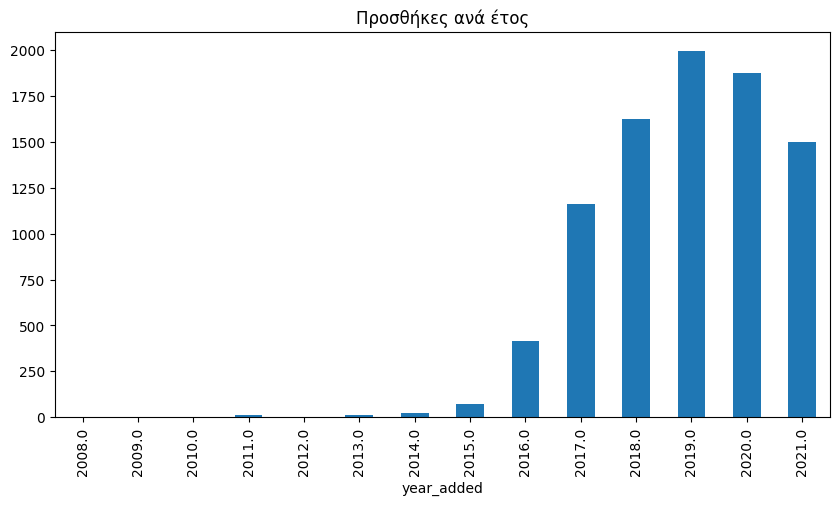

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Προσθήκες ανά έτος')


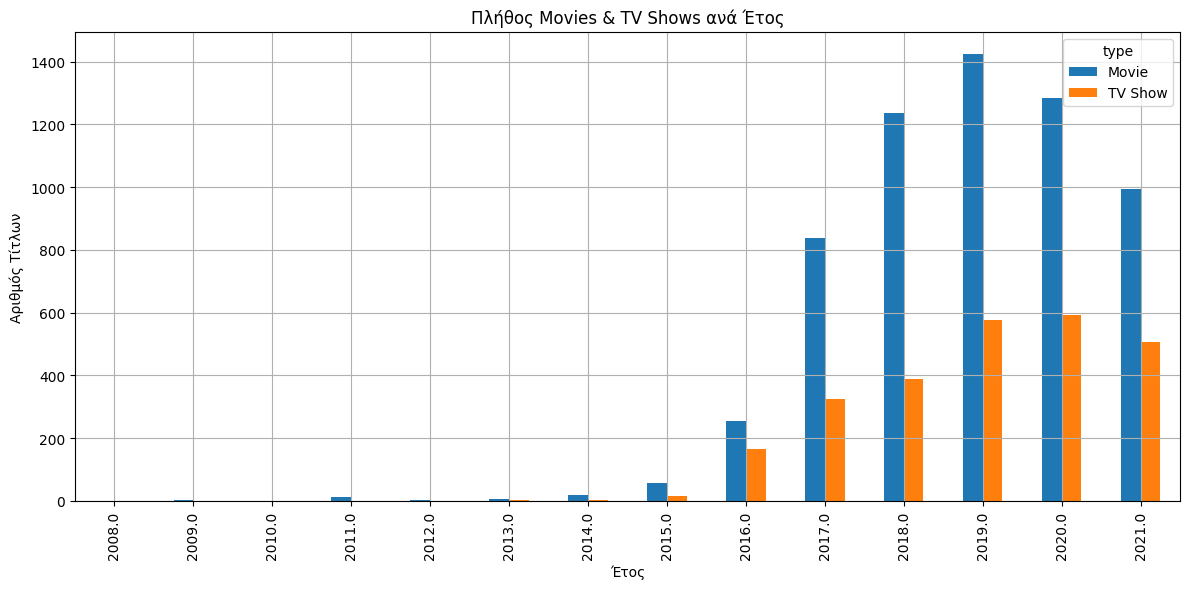

In [22]:
pivot_table = df.pivot_table(
    index='year_added',
    columns='type',
    values='title',
    aggfunc='count'
)

pivot_table.plot(kind='bar', figsize=(12,6), title='Πλήθος Movies & TV Shows ανά Έτος')
plt.ylabel('Αριθμός Τίτλων')
plt.xlabel('Έτος')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
df['genres'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genres')


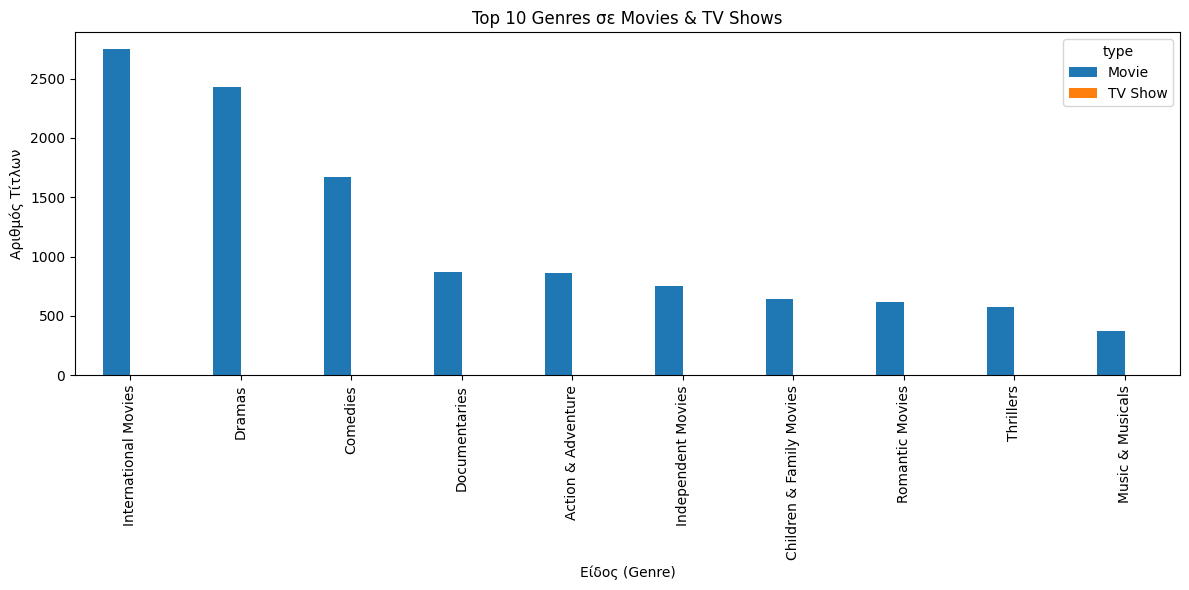

In [24]:
genre_pivot = df_exploded.pivot_table(
    index='genres',
    columns='type',
    values='title',
    aggfunc='count'
).fillna(0).astype(int)

genre_pivot.sort_values('Movie', ascending=False).head(10).plot(
    kind='bar',
    figsize=(12,6),
    title='Top 10 Genres σε Movies & TV Shows'
)
plt.ylabel('Αριθμός Τίτλων')
plt.xlabel('Είδος (Genre)')
plt.tight_layout()
plt.show()


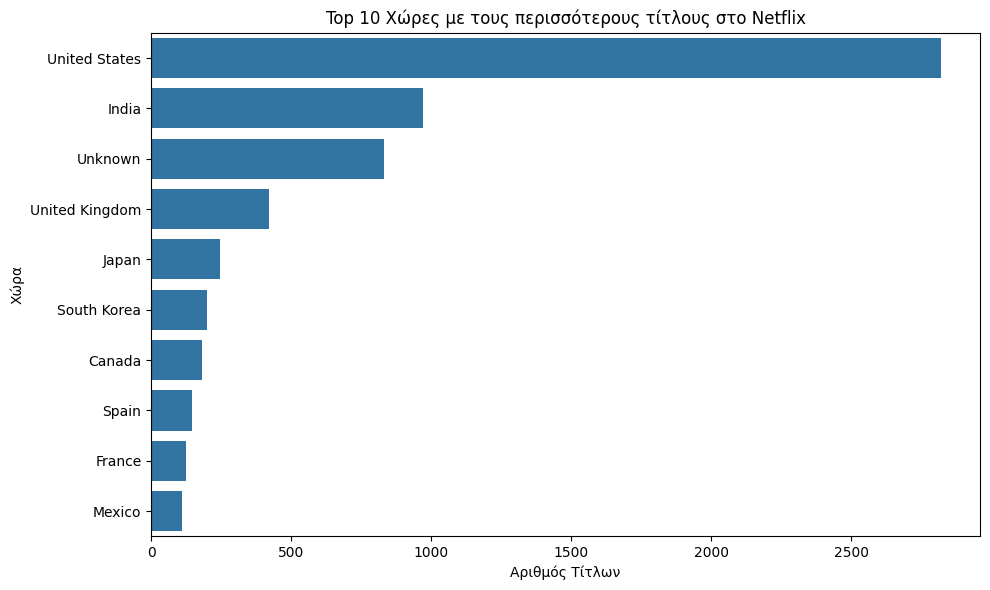

In [25]:
country_count = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_count.values, y=country_count.index)
plt.title('Top 10 Χώρες με τους περισσότερους τίτλους στο Netflix')
plt.xlabel('Αριθμός Τίτλων')
plt.ylabel('Χώρα')
plt.tight_layout()
plt.show()
